In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


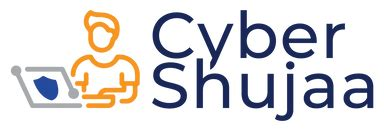
## Assignment 3: Titanic Exploratory Data Analysis
* Name: Julius Momanyi Kanani
* Date: 27th May 2025.
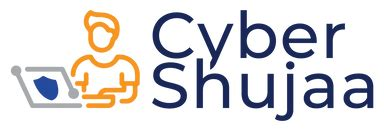

## Take a First Look at the Data Set
* The first thing I will need to do is load in the libraries and dataset I will be using. Then I will proceed to apply **(Exploratory Data Analysis)** EDA skills that I have learnt for this project.

In [2]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

## First Impression of the Data Set
* Quick Overview of the Data Set.

In [3]:
# View shape of the dataset
df.shape

(891, 12)

In [4]:
# Provides details about the columns, their data types, and 
# the number of non-null (non-missing) values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Displays the first few rows of the dataset to give you a quick preview.
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## Shape of the Data set
Understanding the shape of the dataset is a critical first step in any exploratory data analysis. It tells me how many observations (rows) and features (columns) we are working with.

By using the `.shape` function, I find that the Titanic dataset contains **891 rows** and **12 columns**. This means I have data on 891 individual passengers, each described by 12 attributes, including survival status, passenger class, age, fare, and more.

This manageable size makes it ideal for hands-on analysis, allowing for meaningful pattern discovery without the need for heavy computational resources. 

It also provides a sufficient sample size to perform statistical and visual analyses with confidence.

### 🔍 Initial Observations from the First Few Rows

By simply glancing at the first few rows of the Titanic dataset, several initial observations become immediately apparent:

- The **`Cabin`** column contains missing values from the outset, indicating that a large portion of passengers did not have this information recorded. This may be associated with passenger class, as only those in **first class** appear to have cabin numbers listed.

- The **`Fare`** values vary greatly. Some passengers paid very little, while others paid significantly more, likely reflecting differences in **class** or **ticket type**.

- The **`Pclass`** column shows a mix of passengers in both first and third class, which may correlate with other variables such as **fare** or **survival**.

- The **`Survived`** column reveals that most of the **female passengers** shown in these rows survived, while the only **male passenger** listed did not. This hints at a possible relationship between **gender and survival**.

- Most passengers in the preview embarked from **S**, while one embarked from **C**. This suggests that **port of embarkation** may also be connected to class, fare, or survival outcomes.

These early insights help shape the direction of the deeper exploratory data analysis to follow.


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Reflection from the output above.
There were **891 passengers on board** the Titanic whose data is available. The **youngest** among them was just **0.42 years old** (less than 6 months), while the **oldest** was **80 years old**. The **average age** was about **29.7 years**, suggesting that most passengers were relatively young adults.

Interestingly, only **714 passengers** had their age recorded.

**Questions I have:**
- Why are the ages of nearly 180 passengers missing?
- Were they crew members, or were records simply missing for certain groups?

When I look at survival, only **38% of passengers survived**. That’s fewer than 4 out of every 10 people. It makes me wonder:
- Would I have survived, based on my age, class, or travel group?

Looking at passenger class, most people were in **3rd class**, since the median and 75th percentile values both point to class 3. This supports stories that lower-class passengers were placed deeper in the ship and may have had a harder time accessing lifeboats.

The **fare paid** by passengers varied widely — from **£0 to over £512**. The **average fare** was about **£32**, but many paid far less.

**Questions that come to mind:**
- Did passengers who paid more get better access to safety?
- Were those who paid nothing part of the crew or other exempt groups?

When it comes to family onboard, most people were traveling **alone**. The median for both `SibSp` (siblings/spouses) and `Parch` (parents/children) is **0**. However, some individuals had up to **8 siblings or spouses**, and others had as many as **6 parents or children** traveling with them.

**This makes me wonder:**
- Did traveling with family increase a person’s chance of survival?
- Were families able to stay together during the evacuation?

---

In summary, behind each number is a real person. A child, a parent, a student, or a worker. Every one of them boarded the Titanic with hopes and expectations, not knowing the tragedy that awaited. This dataset gives us only a glimpse, but it invites deeper exploration into the lives and experiences of those who were there.

## 🧾 Column Overview and Feature Types

After confirming the dataset shape, I listed all the column names using the `df.columns` function. This gave me a full overview of the features I would be working with throughout this analysis.

In [7]:
# columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Identifying Feature Types in the Dataset

To better understand how to approach each column during analysis, I took time to examine and classify every feature in the dataset based on its data type. This classification helped me determine how to visualize, clean, and later prepare the data for modeling.

Here’s how I broke down the feature types:

### Target Variable
- **`Survived`**: This is the binary target variable — `0` means the passenger did not survive, and `1` means they did. Since it only has two possible values, I treated it as a **categorical binary** variable.

### Categorical Variables
- **`Sex`**: A classic **nominal categorical** variable with two categories: `male` and `female`. This variable is non-numeric and has no inherent order.
- **`Embarked`**: Another **nominal** feature that represents the port of embarkation (`C`, `Q`, or `S`). There's no natural order here, but it may influence survival indirectly.
- **`Cabin`**: Although stored as text, I considered this **categorical**, especially when reduced to the presence or absence of a cabin. I later engineered a binary feature to capture this.
- **`Ticket`**: At first glance, this appears to be a free-text field, but I treated it as **categorical**, since some patterns or shared codes might be useful after cleaning.

###  Numerical Variables
- **`Age`**: This is a **continuous numerical** feature. It includes decimal values, and although it's numeric, it will require imputation for missing values.
- **`Fare`**: Also a **continuous numerical** feature. It is skewed and contains outliers, so I planned to transform or cap it during preprocessing.
- **`SibSp`**: This indicates the number of siblings or spouses aboard. It’s **discrete numerical** (count-based), and some values repeat frequently.
- **`Parch`**: Similar to `SibSp`, this is a **discrete numerical** variable representing the number of parents or children a passenger had on board.

### Ordinal Variable
- **`Pclass`**: This feature represents passenger class — `1`, `2`, or `3`. Although it's stored as an integer, it's actually an **ordinal categorical** variable because it implies a natural order of socioeconomic status: 1st class being the highest and 3rd class the lowest.

### Textual or Identifier Variables
- **`Name`**: This is a **text** feature. While not immediately useful in raw form, I planned to extract titles like `Mr`, `Mrs`, or `Miss` from it, which could serve as a new categorical feature.
- **`PassengerId`**: This is simply a **unique identifier** for each row. It has no analytical value but is useful for tracking or referencing passengers during the analysis.

---

### My Reflection

Taking the time to identify and understand each feature type helped me approach the data more thoughtfully. For example, I realized that while `Pclass` looks numeric, it functions like a ranked category. Similarly, `Cabin` may seem useless due to missing values, but its mere presence could hold meaning. This step influenced the way I chose plots for univariate and bivariate analysis, and how I planned to encode the features for any future machine learning work.

## Checking How Many Unique Values Each Column Has

To understand the data better, I used the function `df.nunique()` to check how many **unique values** each column has. This helps me figure out which columns are identifiers, which ones are categories, and which might be good for analysis or need cleaning.

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Here’s what I noticed:

- **PassengerId** has 891 unique values — this means each passenger has a different ID. It’s just a row number, so I won’t use it for analysis.

- **Name** also has 891 unique values. Everyone has a different name. I might later try to pull out useful parts like titles (Mr., Miss., etc.) for more insights.

- **Ticket** has 681 unique values. Some people might have shared tickets, like family members or people in the same group. It’s a bit messy and will need extra work if I decide to use it.

- **Cabin** has only 147 unique values, and I know that a lot of the data in this column is missing. It might not be useful in its current form, but I can make a new column to show whether someone had a cabin or not.

- **Sex**, **Survived**, **Pclass**, and **Embarked** all have just a few unique values:
  - `Sex` has 2 values: male and female  
  - `Survived` has 2 values: 0 = did not survive, 1 = survived  
  - `Pclass` has 3 values: 1st, 2nd, and 3rd class  
  - `Embarked` has 3 values: the port where people got on the ship

These columns are **categorical**, and I can use bar charts to show how often each category appears.

- **Age** has 88 unique values. Since this is a continuous number (people’s ages), it makes sense that it varies a lot. I’ll use a histogram to show the distribution later.

- **Fare** has 248 unique values. Like Age, it’s a continuous number — and I’ll check if it has outliers or big differences between passengers.

- **SibSp** and **Parch** each have 7 unique values. These show how many siblings/spouses or parents/children each passenger had on board. They’re count numbers and might be useful to create a new column for total family size.

---

### What I Learned

This step helped me understand which columns are important, which ones might need more cleaning, and how I might use them later. It was a great way to start thinking about the data before making any charts or models.

## Handling Missing Values in the Age Column
I needed to deal with the **missing values** in the `Age` column. Around 20% of the passengers do not have an age recorded, which could affect my plots and later analysis.

Instead of simply removing those rows or filling all missing values with one number (like the overall median), I chose to **fill missing ages using the median age within each group** based on:
- Passenger class (`Pclass`) and  
- Gender (`Sex`)

This way, the filled values are more meaningful and realistic. For example, it makes sense that **a female passenger in 1st class** might have a different typical age than a **male in 3rd class**.
I used the group median strategy because it respects the **natural patterns in the data**, avoids bias from a global average, and doesn’t remove any rows.


In [9]:
# Fill missing Age values with the median age of each Pclass and Sex group
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

## Checking for Duplicate Rows

To make sure the dataset is clean, I used the `df.duplicated()` function to check if there are any **duplicate rows** — meaning, rows that are exactly the same across all columns.

In [10]:
# Check how many rows are duplicated
df.duplicated().sum()

0

This means that there are no duplicate rows in the Titanic dataset. Every row is unique, which is a good sign. It tells me that I don’t have to worry about removing repeated data at this stage.

## Importing Visualization Libraries

Before I start creating any charts or graphs, I need to import the libraries that will help me visualize the data. I’ll be using:

- **Seaborn**: great for quick and clean statistical plots  
- **Matplotlib**: the core plotting library used behind the scenes  
- **Plotly**: useful for interactive visualizations

Here's the code I used to import them:

In [11]:
# Import core visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Show plots inside the notebook
%matplotlib inline

# Optional: set a style for seaborn
sns.set(style="whitegrid")

## Univariate Analysis: Exploring One Feature at a Time

Univariate analysis means looking at **one column (feature)** at a time to understand how its values are spread out. This helps me get a sense of the data before comparing it to other features.

Here are some beginner-friendly questions I asked myself during univariate analysis:

### Age
- What is the **age distribution** of passengers?
- Are there more **young people**, **adults**, or **elderly** on board?
- Do I see any **very young children or babies**?
- Is age spread out evenly or are there certain age groups with more passengers?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


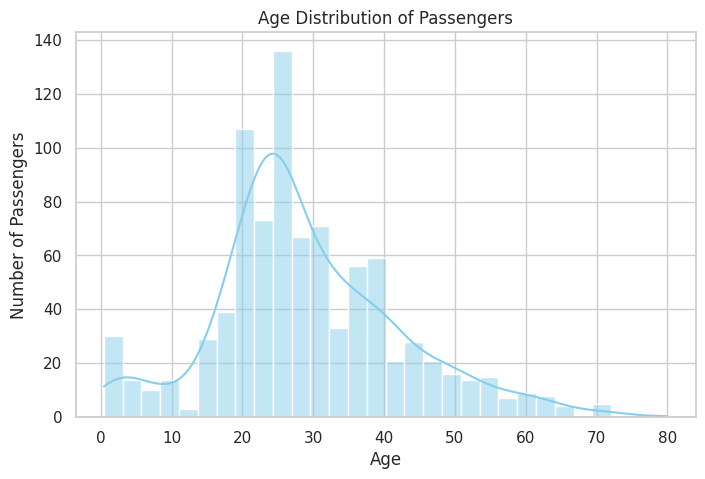

In [12]:
# Age distribution using Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

### My Reflection
Looking at the age distribution, I noticed that most passengers were between 20 and 40 years old. There is a clear peak around the early 20s, which suggests that many people on board were young adults.

There are also children and elderly passengers, but fewer of them. The curve has a slight right skew, meaning there were some older individuals but not as many compared to younger ones.

This visualization helped me understand that the Titanic had a fairly young population overall, which could be important when I later analyze survival rates. I also started to think about whether children and elderly had different chances of survival compared to adults, something I plan to explore in the bivariate analysis.

### Fare

Understanding how much passengers paid for their tickets can tell us a lot about **social class, accessibility**, and even potential influence on **survival chances**. To begin, I asked the following beginner-friendly questions:

- What is the **fare distribution**?
- Are most ticket prices **low, medium, or high**?
- Are there any **extremely expensive tickets** (outliers)?
- Is the fare data **skewed** (most people paid low, but a few paid very high)?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


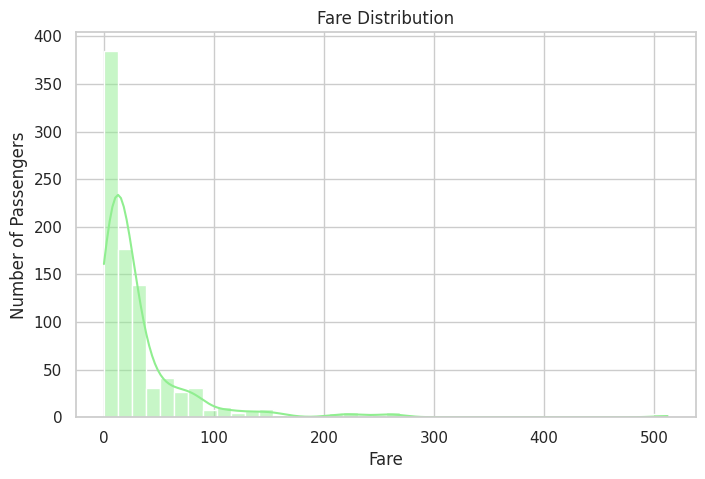

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=40, kde=True, color='lightgreen')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

### My Reflection
When I looked at the fare distribution, the first thing I noticed was that most passengers paid low fares, between 0 and 50. There’s a long tail on the right side of the graph, meaning there were some very expensive tickets, one even close to $500. These are known as outliers, and they often belong to wealthy first-class passengers.

This pattern made it clear to me that the fare data is right-skewed. In simple terms, most people paid small amounts, but a few paid a lot. This kind of skewness is important to notice because it can affect how models interpret the data later on.

As a beginner, this taught me how important it is to visually check the spread of values, not just rely on averages. If I only looked at the mean fare, I might have thought the typical price was much higher than it really was, because a few wealthy passengers pull the average up.

Later, I plan to explore how these fares connect to passenger class and survival, and whether it’s helpful to cap the very high fares during modeling.

## Embarkation Analysis

I wanted to understand where passengers boarded the Titanic. This information is stored in the `Embarked` column, which includes three possible ports:

- **C**: Cherbourg  
- **Q**: Queenstown  
- **S**: Southampton

To explore this column, I asked myself:

- How many passengers **embarked** from each port (`C`, `Q`, or `S`)?  
- Which embarkation point was **most common**?  
- Are there any **missing values** in this column?


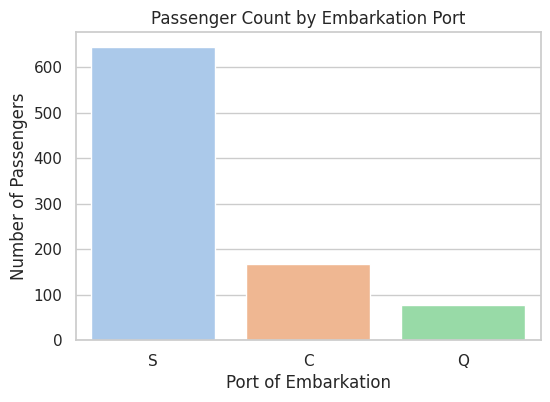

Missing values are only 2


In [14]:
# Count plot for Embarked column
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.show()

# Check for missing values
missing = df['Embarked'].isnull().sum()

print(f"Missing values are only {missing}")

### My Reflection
From the bar chart, I saw that Southampton (S) was by far the most common port, most passengers boarded the ship there. Cherbourg (C) had the second highest number, while Queenstown (Q) had the fewest.

I also checked for missing values and found two passengers with no embarkation data. That was a small number, so I decided I could fill in the missing values later using the most common value (S) without affecting the overall dataset much.

As a beginner, this analysis taught me how useful categorical bar plots are. They quickly show how data is spread across different categories. It also reminded me not to ignore small amounts of missing data, every column is worth checking.

Next, I plan to see if the port where passengers boarded had any connection to their class or chances of survival.

## Passenger Gender (Sex)

Next, I wanted to understand the **gender distribution** of passengers on the Titanic. The `Sex` column contains two categories: `male` and `female`.

Here are the questions I asked:

- How many passengers were **male** and how many were **female**?  
- Is there a **gender imbalance** on the ship?

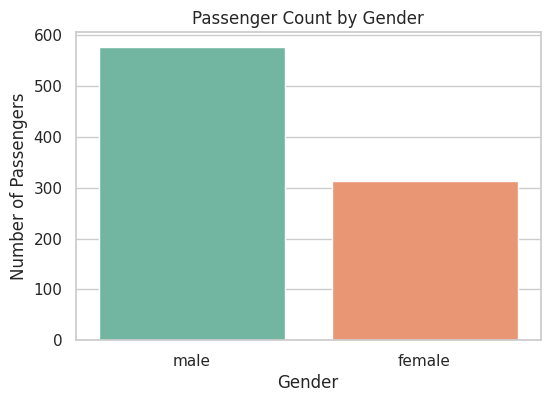

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
# Countplot for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Passenger Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

# View actual value counts
df['Sex'].value_counts()

### My Reflection
From the bar chart and value counts, I saw that there were significantly more male passengers than female passengers. In fact, nearly two-thirds of the people on board were men. That means there was a clear gender imbalance on the ship.

As a beginner, this made me curious about whether gender had anything to do with survival chances. It’s easy to assume that with more men on board, more men might have survived — but history tells a different story. I’m now more interested in comparing gender vs. survival in the next stage of my analysis.

This small but important check helped me understand the value of asking simple questions and using clear visuals to confirm patterns in the data.

## Passenger Class (Pclass)

Now I wanted to explore the `Pclass` column, which tells me what class each passenger traveled in:

- `1` = First Class  
- `2` = Second Class  
- `3` = Third Class

Here are the questions I asked myself:

- How many passengers were in **1st**, **2nd**, and **3rd** class?  
- Which class had the **highest number of passengers**?

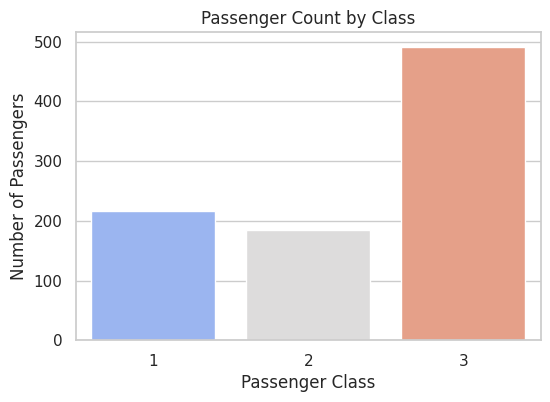

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
# Countplot for passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df, palette='coolwarm')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

# Check value counts
df['Pclass'].value_counts()

## My Reflection
From the chart, it’s clear that the majority of passengers were in 3rd class. Fewer passengers traveled in 2nd class, and 1st class had the smallest group overall.

As someone new to data analysis, I found this really interesting because it shows the social structure of the Titanic. Most people traveled in the lowest class, which could reflect affordability or accessibility. It also made me start thinking about how class might have influenced survival, were 1st class passengers more likely to survive? That’s something I’ll check in the next part of my analysis.

## Bivariate Analysis

Now that I’ve looked at each feature on its own, the next step is to explore how **two features relate to each other**. This is called **bivariate analysis**.

By comparing features in pairs, I can start to discover patterns, such as:

- Do passengers in higher classes pay more?  
- Are younger passengers more likely to survive?  
- Does where someone boarded the ship relate to their chance of survival?

In this section, I’ll look at each of these questions, one at a time — using visualizations to help me understand the relationships between the variables.

### Question 1: Does the Fare change depending on the Pclass?

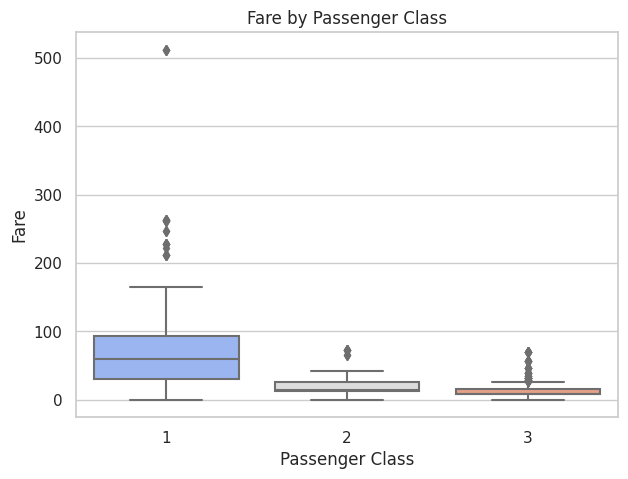

In [17]:
# Boxplot to compare Fare by Passenger Class
plt.figure(figsize=(7, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')
plt.title('Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

## My Reflection
This boxplot showed a clear pattern: passengers in 1st class paid the highest fares, while those in 3rd class paid the lowest. The difference is quite large, and there are some outliers in all three classes, especially in 1st class — where some tickets cost over $500.

As a beginner, this plot made me realize how powerful it is to compare two features visually. Without the plot, I might have missed how consistent the pattern is: fare generally decreases as the class number increases (1 → 2 → 3). This confirms that Pclass isn’t just a number — it reflects social and economic status on the ship.

It also helped me better understand the distribution I saw earlier in the Fare histogram, where most people paid low prices but a few paid very high ones.

## Question 2: Are younger passengers more likely to survive on the Titanic?

## ❓ Are younger passengers more likely to survive on the Titanic?

In this part of the bivariate analysis, I wanted to explore whether a passenger’s **age** affected their **chance of survival**. Earlier, I observed that most passengers were between 20 and 40 years old, but that doesn’t tell me if **younger** passengers were more likely to survive.

To find out, I used a histogram to compare age distribution between **those who survived** and **those who did not**. This allowed me to look at both age and survival in one chart.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


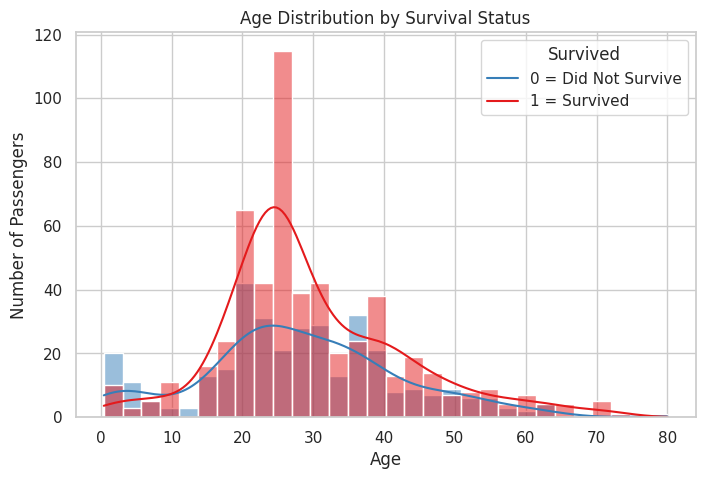

In [18]:
### Code: Age vs. Survival (Histogram with Hue)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set1')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['0 = Did Not Survive', '1 = Survived'])
plt.show()

### 🧠 My Reflection

This chart helped me see that **young children**, especially those under 10 years old, had a **higher survival rate** compared to other age groups. The line for survivors is noticeably higher in this age range.

For adults, especially those between 20 and 50, the difference between survivors and non-survivors is less clear. It seems that adults had a more equal chance of surviving or not.

As someone still learning data analysis, I found this visualization very useful. It gave me a real-world insight: **younger age may have increased a passenger's chance of survival**, possibly due to evacuation rules that gave priority to children. It also showed me the value of comparing features side by side instead of just looking at them alone.


## Multivariate Analysis

So far, I’ve explored individual variables (univariate analysis) and pairs of variables (bivariate analysis). Now, I want to take it a step further by looking at **three or more features at once**.

This helps me detect **interactions and hidden patterns** that may not show up when comparing only two features.

Here are some questions I explored:

- How do **Pclass**, **Age**, and **Fare** work together to affect survival?
- Are survival rates different depending on **Embarked location and Pclass**?

I’ll start with the first one.

## 1. How do Pclass, Age, and Fare jointly affect survival?

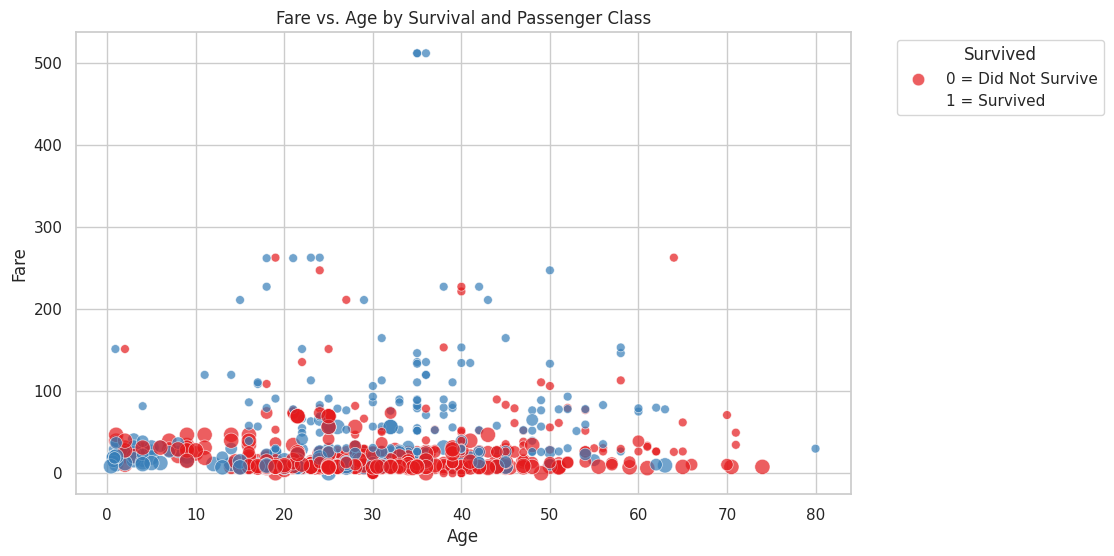

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', size='Pclass', palette='Set1', sizes=(40, 120), alpha=0.7)
plt.title('Fare vs. Age by Survival and Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['0 = Did Not Survive', '1 = Survived'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### My Reflection
This multivariate scatter plot helped me see how age, fare, and class together relate to survival.

A few things stood out:

Survivors (in red) tended to appear in the lower age and higher fare range — these are often young, 1st-class passengers.

Many non-survivors (in blue) paid low fares and were older — mostly from 3rd class.

Bubble sizes helped me see that larger circles (1st class) mostly appeared in the upper-fare range, and those passengers had a better chance of survival.

This was one of the most informative plots so far. It made me realize that survival wasn’t just about one thing like age or fare. Instead, it’s the combination of factors — like being young, paying more, and traveling in 1st class — that really influenced survival chances.

As a beginner, this taught me the power of layered visualizations. Multivariate plots might look busy, but with the right design, they can tell a rich story all at once.

## Outlier Detection and Handling

Outliers are values that are **much higher or lower than the rest of the data**. They can sometimes be errors or inconsistencies, but they can also be **real and meaningful** — especially in a dataset like Titanic, where some passengers were extremely wealthy and paid very high fares.

As a beginner, I learned that outliers can:
- **Distort visualizations**
- **Affect model performance**
- Or, in some cases, **tell an important story**

Instead of removing outliers immediately, I explored them first using **boxplots** and then made a decision for each feature.

---

### Fare

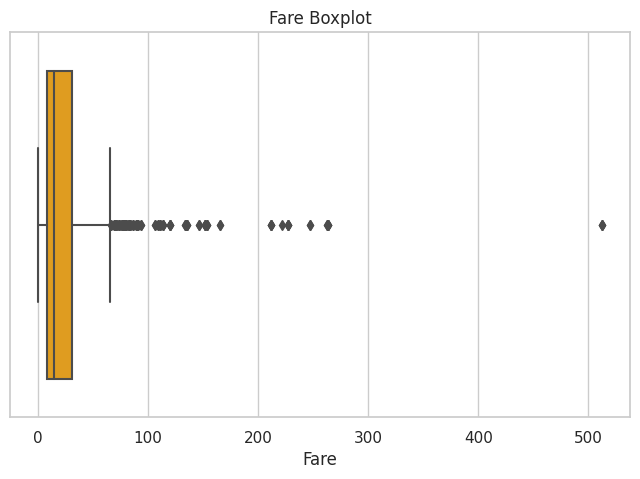

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'], color='orange')
plt.title('Fare Boxplot')
plt.xlabel('Fare')
plt.show()

### My Decision
I noticed that most passengers paid less than $100, but a few paid over $500, which makes them outliers.

However, these outliers are not mistakes — they represent first-class passengers who paid premium fares. Removing them would hide important information about wealth and class differences, which are part of the Titanic story.

For this reason, I chose to leave the outliers in place for analysis, but I might cap them later when preparing data for a machine learning model to avoid skewing predictions.

## Age

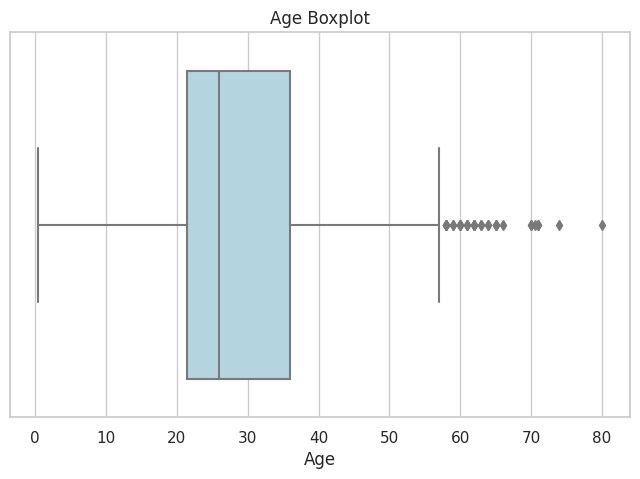

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

### My Decision
The age boxplot showed a few outliers on the higher end — passengers older than 70 or 80. But again, these values make sense, as people of all ages were on board.

There were no obvious inconsistencies or unrealistic values, so I decided to keep the age data as is.

### My Reflection
This part of the analysis taught me that outliers aren’t always wrong. It’s easy to assume that extreme values should be removed, but in this case, they tell a deeper story. For example, knowing that some passengers paid $500+ says something about class structure, and keeping elderly passengers in the data helps preserve real-world patterns.

## Target Variable Exploration: `Survived`

The `Survived` column is the **target variable** in this dataset. It shows whether each passenger survived (`1`) or did not survive (`0`).

Before building any models or drawing conclusions, I wanted to:
- Understand the **overall distribution** of this variable
- See if the dataset is **balanced or imbalanced**
- Explore which **other features (like sex, class, or embarkation)** may have influenced survival
## Countplot of Survival Distribution

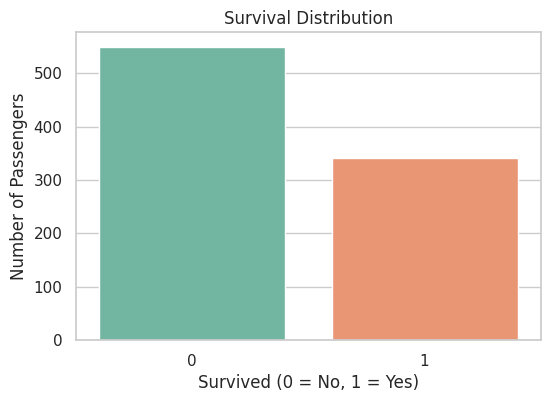

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

# View actual counts
df['Survived'].value_counts(normalize=True)


### What I Observed

This plot showed that about **38% of passengers survived**, while **62% did not survive**. The dataset is **somewhat imbalanced**, but not extremely, so it's still usable for classification tasks without heavy adjustments.

This imbalance also reflects the **real historical event**, where more people died than survived.
## Survival by Sex

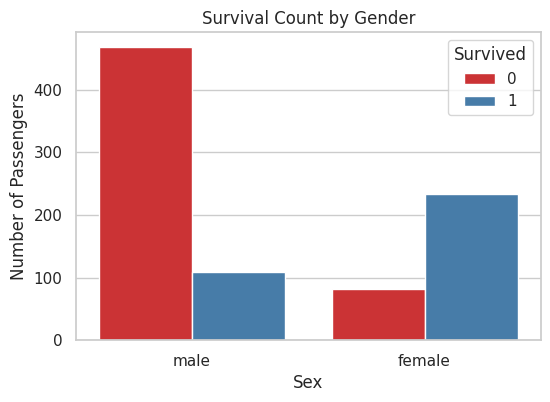

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived')
plt.show()


### What I Observed

This chart made it very clear that **females were far more likely to survive** than males. Even though there were more male passengers overall, **more females survived**.

This supports the idea that gender played a strong role in survival, possibly because of evacuation policies that prioritized women and children.
## Survival by Pclass

### What I Observed

First-class passengers had the highest survival rate. Third-class passengers had the lowest.

This plot helped me see that **passenger class (Pclass)** was a strong factor in survival. Being in 1st class likely meant better access to lifeboats and faster assistance during the evacuation.
## Survival by Embarked and Pclass (Interaction Effect)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x500 with 0 Axes>

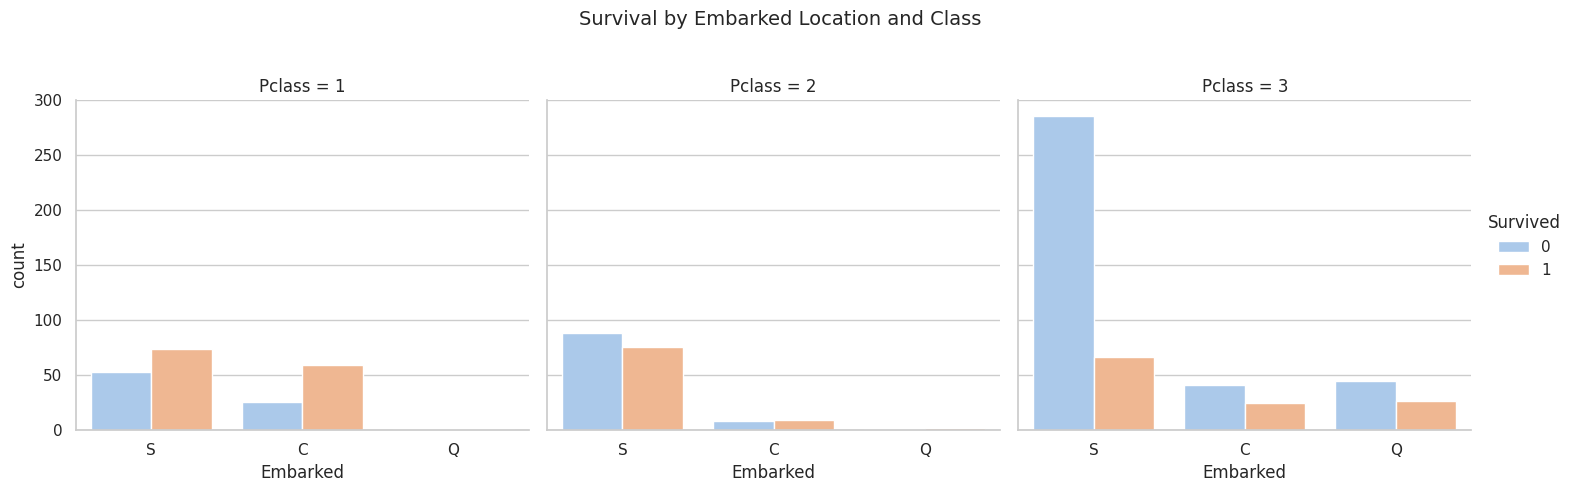

In [24]:
plt.figure(figsize=(8, 5))
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count', palette='pastel')
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Embarked Location and Class', fontsize=14)
plt.show()


### My Reflection

This plot let me explore how **Embarked location and Pclass interact** with survival. For example:
- In **1st class**, passengers from Cherbourg (C) had a very high survival rate.
- In **3rd class**, passengers from Southampton (S) had the lowest survival rate.

This showed me that the survival story is not about one feature alone, instead, it's the **combination** of features like class and location that shapes outcomes.

As a beginner, I found this part of the analysis to be the most powerful. The plots told a story, about class, opportunity, and even inequality, and helped me understand how data reflects real events.


## Conclusion / Summary of Findings

This Exploratory Data Analysis (EDA) exercise helped me develop a deeper understanding of the Titanic dataset and build practical data exploration skills.

Here’s a summary of what I found:

### Initial Exploration
- The dataset contains **891 passengers** and **12 columns**.
- Some columns like `Cabin` had **many missing values**, while others like `Age` had moderate missing values.
- All `PassengerId` and `Name` values were unique, while features like `Pclass`, `Sex`, and `Embarked` had a few distinct categories.

### Univariate Analysis
- Most passengers were **young adults**, and few were over 60.
- **3rd class** had the largest number of passengers.
- Most people **embarked from Southampton** and were **male**.
- The **Fare** distribution was highly **skewed**, with a few very high values.

### Bivariate Analysis
- **Higher fare** was strongly associated with **1st class**.
- **Younger children** had a higher survival rate.
- **Women** were far more likely to survive than men.
- **1st class passengers** had the highest survival rates.
- Embarkation port, when considered alongside class, also showed survival differences.

### Multivariate Analysis
- **Age, class, and fare** together showed a strong influence on survival.
- Combining `Embarked` and `Pclass` revealed interaction effects that would be missed if I looked at only one variable at a time.

### Outlier Handling
- I decided to **keep outliers** in the `Fare` and `Age` columns during analysis because they represent real and important differences, especially for wealth and age extremes.
- I used **group-based median imputation** to handle missing values in `Age`, based on `Pclass` and `Sex`.

### Target Variable Insights (`Survived`)
- The dataset is **somewhat imbalanced** — about 38% survived.
- **Gender, class, and embarkation point** all had strong relationships with survival.
- **Interaction plots** helped show that survival is shaped by **multiple features working together**, not just one at a time.

---

### Personal Reflection

As a beginner, I learned how to ask the right questions, visualize my data, and clean inconsistencies before analyzing anything. The process of exploring data step by step made it easier to understand what the dataset was really saying. I also realized how important it is to look at **combinations of features** to detect deeper patterns.

This EDA exercise has given me a foundation I can build on for modeling, and a real example I can confidently add to my portfolio.